In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('student_info.csv')
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


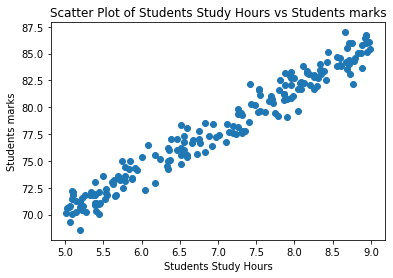

In [10]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [11]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
df2 = df.fillna(df.mean())
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred  = lr.predict(X_test)
y_pred
lr.predict([[4]])[0][0].round(2)

66.17

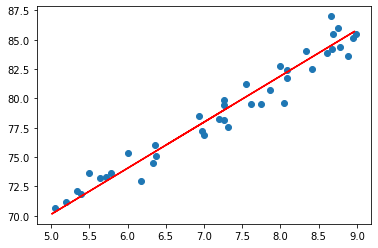

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
import joblib
joblib.dump(lr, "Students_mark_predictor_model.pkl")